## Libraries and Datasets

In [0]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
#X dimension is 30

In [3]:
print(X_cancer)
print("X dimension is:", len(X_cancer[0]))
print("==================")
print(y_cancer)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
X dimension is: 30
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0

##Utils

In [0]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#0000FF', '#000000', '#FF0000', '#66FF66']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Dataset PCA (n_components = 2)')

    plt.show()

## Dimensionality Reduction and Manifold Learning

### Principal Components Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

#cancer = load_breast_cancer()
#(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset

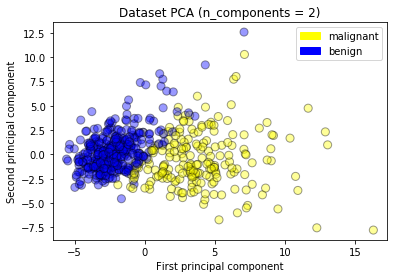

xlabel: First principal component
ylabel: Second principal component
titel: Breast Cancer Dataset PCA (n_components = 2)


In [6]:
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

print('xlabel: First principal component')
print('ylabel: Second principal component')
print('titel: Breast Cancer Dataset PCA (n_components = 2)')

#plt.xlabel('First principal component')
#plt.ylabel('Second principal component')
#plt.title('Breast Cancer Dataset PCA (n_components = 2)')

### Manifold learning methods

#### Multidimensional scaling (MDS) on the breast cancer dataset

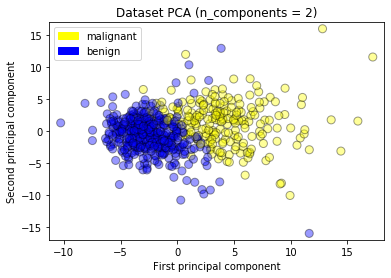

xlabel: First MDS dimension
ylabel: Second MDS dimension
titel: Breast Cancer Dataset MDS (n_components = 2)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

print('xlabel: First MDS dimension')
print('ylabel: Second MDS dimension')
print('titel: Breast Cancer Dataset MDS (n_components = 2)')

#plt.xlabel('First MDS dimension')
#plt.ylabel('Second MDS dimension')
#plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the breast cancer dataset

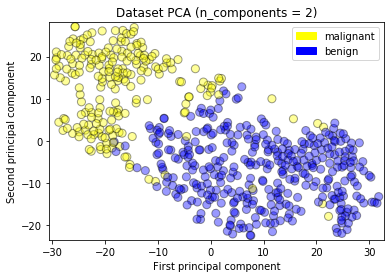

xlabel: First t-SNE feature
ylabel: Second t-SNE feature
titel: Breast cancer dataset t-SNE


In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, ['malignant', 'benign'])

print('xlabel: First t-SNE feature')
print('ylabel: Second t-SNE feature')
print('titel: Breast cancer dataset t-SNE')

#plt.xlabel('First t-SNE feature')
#plt.ylabel('Second t-SNE feature')
#plt.title('Breast cancer dataset t-SNE');

## Clustering

### K-means

This example creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

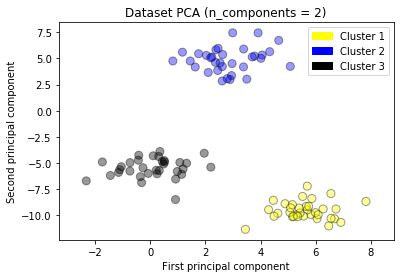

y label: [2 2 1 0 1 1 0 2 1 0 0 1 1 2 2 1 0 1 0 1 0 2 1 2 0 1 1 1 1 0 2 1 1 0 2 2 2
 1 1 1 2 0 2 2 1 0 0 0 2 0 1 2 0 0 2 0 1 2 0 0 1 1 2 2 2 0 0 2 2 2 1 0 1 1
 2 1 1 2 0 0 0 1 0 1 2 1 2 0 2 2 0 0 0 2 2 2 1 0 0 0]
total sample is: 100


In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

print("y label:", y)
print("total sample is:", len(y))

### Agglomerative clustering

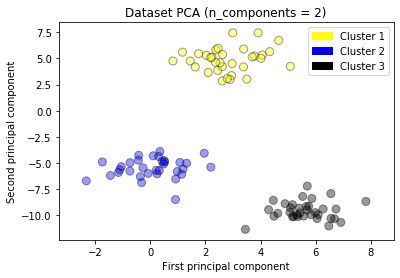

y label: [2 2 1 0 1 1 0 2 1 0 0 1 1 2 2 1 0 1 0 1 0 2 1 2 0 1 1 1 1 0 2 1 1 0 2 2 2
 1 1 1 2 0 2 2 1 0 0 0 2 0 1 2 0 0 2 0 1 2 0 0 1 1 2 2 2 0 0 2 2 2 1 0 1 1
 2 1 1 2 0 0 0 1 0 1 2 1 2 0 2 2 0 0 0 2 2 2 1 0 0 0]
total sample is: 100


In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

print("y label:", y)
print("total sample is:", len(y))

### DBSCAN clustering

Cluster membership values:
[ 0  0  1  2  3  3  3  0  0  1  1  2  3  0  0  3  1  1 -1  3  3  1  0  3
  1]


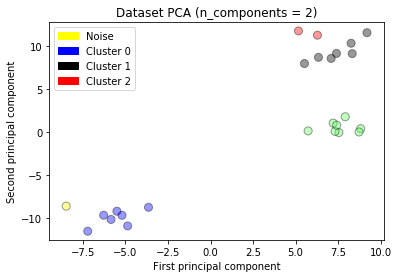

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 8, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))
plot_labelled_scatter(X, cls + 1, ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])